# Project 1: Regression

This project asks you to perform various experiments with regression. The dataset we are using is taken from a real estate dataset:

https://www.kaggle.com/datasets/mirbektoktogaraev/madrid-real-estate-market

The objective of this project is to become familiar with the underlying techniques of machine learning, and implement some of the techniques yourself. 

You will write code and discussion texts into code and text cells in this notebook. 

If a block starts with TODO:, this means that you need to write something there. 

Some code had been written for you to guide the project. Don't change the already written code.




In [8]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk

## Setup for  the project

For problems P1 to P5 we are using a simple dataset where we extract one 
explanatory variable ``sq_mt_built`` to predict the price of the house ``buy_price``

The lenght 21742
The columns of the database Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',


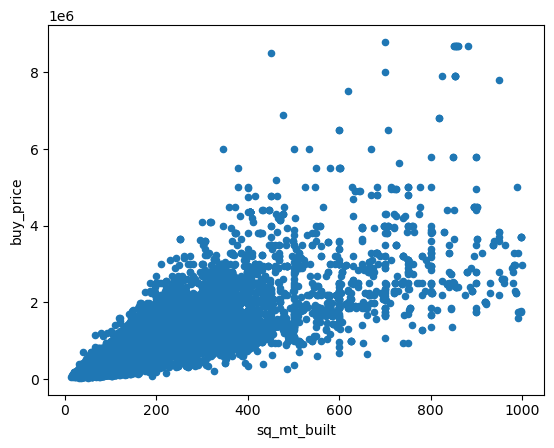

In [9]:
df = pd.read_csv("houses_Madrid.csv")
print(f"The lenght {len(df.index)}")
print(f"The columns of the database {df.columns}")
df[["sq_mt_built", "buy_price"]].plot.scatter(x="sq_mt_built", y="buy_price")
df = df[["sq_mt_built", "buy_price"]].fillna(False)
## FIXME: add here the creation of the training data and test data

df_shuffled = df.sample(frac=1) # shuffle the rows

In [27]:
x = df_shuffled["sq_mt_built"].to_numpy(dtype=np.float64)
y = df_shuffled["buy_price"].to_numpy(dtype=np.float64)
training_data_x = x[:16000]
training_data_y = y[:16000]
test_data_x = x[16000:]
test_data_y = y[16000:]

In [28]:
training_data_y

array([ 127000.,  210000., 1295000., ...,  269000.,  285000.,  225000.])

## P1: Loss function (10 pts)
Implement a root-mean-square error (RMSE) loss function between the prediction $\hat{y}$ and $y$ value using Python operations. Run some experiments to validate that this works as expected. 
Then, look up the same in the sklearn library
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
and implement it based on what is there. 

In [41]:
# TODO: implement the loss function here using Python math ops and sklearn
import math
from sklearn.metrics import mean_squared_error
def loss_RMSE(y, yhat):# usingthe rmse formula to visualize the difference between the predicted values and the act vals Y
    actDiff = [actual - predicted for actual, predicted in zip(y, yhat)]
    squared_actDiff = [d ** 2 for d in actDiff]
    sum_squared_actDiff = sum(squared_actDiff)
    n = len(y)
    mean_squared_actDiff = sum_squared_actDiff / n
    rmse = math.sqrt(mean_squared_actDiff)
    return rmse

def loss_RMSE_sk(y, yhat):
    rmse = mean_squared_error(y, yhat, squared=False)
    return rmse

In [39]:
# TODO: Now, run some experiments with your function, with the one taken with sklearn 
# Compare their outputs.
y = [5, 1, 2, 9]
yhat = [7.3,2.3, 1, 6]

rmse_homebrew = loss_RMSE(y, yhat)
rmse_sklearn = loss_RMSE_sk(y, yhat)
# 2 diff RMSE functions

print(f"my func for rmse: {rmse_homebrew}")
print(f"SK rmse: {rmse_sklearn}")

my func for rmse: 2.060339777803651
SK rmse: 2.060339777803651


C:\Users\thath\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## P2: Implement a linear predictor (10 pts)
Implement a function of type ``predict(x, theta) --> y_hat`` which implements a linear model of the type $\hat{y} = \theta_1 \cdot x + \theta_0$

In [55]:
# TODO: implement the predictor function here
def predict(x, theta):
    #yhat predicted value for x ,x = input data, theta0 = the y intercept, theta1 = the slope
    yhat = theta[0] #starting point of data 
    #check if x is a list of features (basically an array) or a single value 
    if isinstance(x, list):
        for i in range(len(x)):
            yhat += theta [i+1] * x[i] #if x is a list of features it then proceeds to get multiplied by the corresponding weight
    else :
        yhat += theta[1] *x # in the case that its not a list we simply just multiply it by its weight
    return yhat

In [70]:
# TODO: now, run some experiments with it
# helper code to visual the results better
def display_prediction(x, theta, yhat):
    print(f"Model Parameters (theta): {theta}")
    print(f"Input Features (x): {x}")
    print(f"Predicted Value (y_hat): {yhat}")
    print('-' * 50)
    
theta1 = [100000, 2500]
x1 = 200  
# Call the predict function
yhat_1 = predict(x1, theta1)
display_prediction(x1, theta1, yhat_1)


Model Parameters (theta): [100000, 2500]
Input Features (x): 200
Predicted Value (y_hat): 600000
--------------------------------------------------


## P3: Implement a "grid search" function (20 pts)
Implement a function grid_search() which returns an estimate of the best $\theta$ by trying out all the combinations of possibilities on a grid and returning the values that give you the most values. 
gridx and gridy define the range of numbers that we want to explore. For instance, grid0 might be [0, 0.25, 0.5, 0.75, 1.0] 

In [67]:
# TODO: implement the grid search function here 
def grid_search(training_data_x, training_data_y, grid0, grid1):
    #we do this to minimize the error on the training data 
    optimal_theta = [0,0]
    minimum_error = float(100000000000000000) # starting with rediculusly highnum so any actual error will be lower then it
    for t0 in grid0:
        for t1 in grid1:
            #nested loop implementation of a grid 
            theta = [t0, t1] 
            predicts = [predict(x, theta) for x in training_data_x] # where we predict the output using our theta 
            currMSE = sum((yhat - y) ** 2 for yhat, y in zip(predicts, training_data_y)) / len(training_data_y) # the MSE btw predict and actu
            
            if currMSE < minimum_error:
                minimum_error = currMSE
                optimal_theta = theta 
            
    return optimal_theta


In [69]:
# TODO: run some experiments with grid_search
# Define some grid values. Train it on the data set. Test it on the test set. 
# Print the loss on the data set and the test set. Measure and print how long the training takes.
import time
def run_experiment(training_data_x, training_data_y, test_data_x, test_data_y, grid0, grid1):
    # Measure training time
    start_time = time.time()
    best_theta = grid_search(training_data_x, training_data_y, grid0, grid1)
    duration = time.time() - start_time

    # Calculate training loss using sklearn's mean_squared_error
    train_predictions = [predict(x, best_theta) for x in training_data_x]
    train_loss = mean_squared_error(training_data_y, train_predictions)

    # Calculate test loss using sklearn's mean_squared_error
    test_predictions = [predict(x, best_theta) for x in test_data_x]
    test_loss = mean_squared_error(test_data_y, test_predictions)

    # Print results
    print(f"Training completed in {duration:.4f} seconds.")
    print(f"Training Loss (MSE): {train_loss}")
    print(f"Test Loss (MSE): {test_loss}")
    print(f"Best theta: {best_theta}")

# Define grid values for theta[0] (intercept) and theta[1] (weight)
grid0 = [0, 1, 2, 3, 4, 5]  # Grid for theta[0]
grid1 = [0.5, 1, 1.5, 2]    # Grid for theta[1]

# Run the experiment with your dataset
run_experiment(training_data_x, training_data_y, test_data_x, test_data_y, grid0, grid1)

Training completed in 0.1325 seconds.
Training Loss (MSE): 1036763302822.1805
Test Loss (MSE): 1042530390133.6196
Best theta: [5, 2]


In [90]:
# TODO: repeat the experimentation from above with different grids. 
# Finally, print the grid that provides the best value while still running faster 
# than 10 seconds.
def run_expw_time_constr(training_data_x, training_data_y, test_data_x, test_data_y, grid0, grid1):
    start_time = time.time()
    best_theta = grid_search(training_data_x, training_data_y, grid0, grid1)
    duration = time.time() - start_time

    if duration < 10:  # only using those < 10s
        train_predictions = [predict(x, best_theta) for x in training_data_x]
        train_loss = mean_squared_error(training_data_y, train_predictions)
        test_predictions = [predict(x, best_theta) for x in test_data_x]
        test_loss = mean_squared_error(test_data_y, test_predictions)
        return test_loss, duration, best_theta, grid0, grid1
        
grids = [
    (list(range(0, 101, 10)), list(range(10, 101, 10))),     
    (list(range(0, 201, 20)), list(range(10, 151, 20))),     
    (list(range(0, 501, 50)), list(range(50, 301, 50)))       
]
# Variables to keep best results
best_loss = float(10000000000000000000000000000000000000000000)
best_grid = None
best_theta = None
best_duration = 0

for grid0, grid1 in grids:
    test_loss, duration, theta, grid0_used, grid1_used = run_expw_time_constr(training_data_x, training_data_y, test_data_x, test_data_y, grid0, grid1)
    if test_loss < best_loss:
        best_loss = test_loss
        best_grid = (grid0_used, grid1_used)
        best_theta = theta
        best_duration = duration

if best_grid:
    print(f"Best Grid (Grid0: {best_grid[0]}, Grid1: {best_grid[1]}) completed in {best_duration:.4f} seconds.")

Best Grid (Grid0: [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500], Grid1: [50, 100, 150, 200, 250, 300]) completed in 0.3655 seconds.


## P4: Implement a random search function (20 pts)
Implement a function that returns the estimate for the best $\theta$ by trying out random 
$\theta=[\theta_0, \theta_1]$ values, and returning the one that minimizes the error on the training set passed to it. The number of tries is described in the ``trials`` parameter.

In [93]:
# TODO: implement the random search function here
import random
def random_search(training_data_x, training_data_y, trials):
    theta = [0, 0]
    best_mse = float(100000000000000000000000000000000000000)

    for _ in range(trials):
        # Randomly generate theta values
        theta0 = random.uniform(0, 1000) 
        theta1 = random.uniform(0, 1000) 
        
        theta = [theta0, theta1]
        
        # Get predictions and calculate MSE
        predictions = [predict(x, theta) for x in training_data_x]
        mse = mean_squared_error(training_data_y, predictions)
        
        # If current MSE is better, update theta
        if mse < best_mse:
            best_mse = mse

    return theta

In [94]:
# TODO: run some experiments with random_search
# Choose some value for trial. Train it on the data set. Test it on the test set. 
# Print the loss on the data set and the test set. Measure and print how long the training takes.
def run_rando_exp(training_data_x, training_data_y, test_data_x, test_data_y, trials):
    start_time = time.time()
    best_theta = random_search(training_data_x, training_data_y, trials)
    
    # Measure training time
    duration = time.time() - start_time
    
    train_preds = [predict(x, best_theta) for x in training_data_x]
    test_preds = [predict(x, best_theta) for x in test_data_x]
    train_loss = mean_squared_error(training_data_y, train_preds)
    test_loss = mean_squared_error(test_data_y, test_preds)

    print(f"Training took {duration:.4f} seconds")
    print(f"Train Loss: {train_loss}")
    print(f"Test Loss: {test_loss}")
run_rando_exp(training_data_x, training_data_y, test_data_x, test_data_y, trials=1000)


Training took 3.3758 seconds
Train Loss: 967558749477.052
Test Loss: 975727296587.1727


## P5: Using the sklearn library (40 pts)

Use ``sklearn.linear_model.LinearRegression`` to solve the same problem you previously solved using the grid search and random search.

Compare the returned values with what you have achieved. Compare the parameters that had been found to the parameters you have found. Compare the speed. 

In [97]:
# TODO: Implement here# Using sklearn's LinearRegression to solve the problem
from sklearn.linear_model import LinearRegression
def run_sklearn_experiment(train_x, train_y, test_x, test_y):
    start_time = time.time()

    # Train the model
    model = LinearRegression()
    model.fit(train_x.reshape(-1, 1), train_y)
    duration = time.time() - start_time
    train_preds = model.predict(train_x.reshape(-1, 1))
    test_preds = model.predict(test_x.reshape(-1, 1))

    # Calculate MSE
    train_loss = mean_squared_error(train_y, train_preds)
    test_loss = mean_squared_error(test_y, test_preds)

    theta_0_sklearn = model.intercept_
    theta_1_sklearn = model.coef_[0]

    # Output results
    print(f"Training with sklearn took {duration:.4f} seconds")
    print(f"Train Loss (MSE): {train_loss}")
    print(f"Test Loss (MSE): {test_loss}")
    return theta_0_sklearn, theta_1_sklearn, train_loss, test_loss, duration
theta_0_sklearn, theta_1_sklearn, train_loss_sklearn, test_loss_sklearn, duration_sklearn = run_sklearn_experiment(
    training_data_x, training_data_y, test_data_x, test_data_y
)


Training with sklearn took 0.0010 seconds
Train Loss (MSE): 254473948128.42618
Test Loss (MSE): 264077662133.13458


NameError: name 'best_theta_grid' is not defined

TODO: discuss the performance of the sklearn library implementation, compared to what you implemented.